In [1]:
import pandas as pd

def load_data(filepath):
    try:
        df = pd.read_csv(filepath)
        print(f'Dataframe shape: {df.shape}')
        print(f'Dataframe columns: {df.columns.tolist()}')
        df.info()
        return df

    except Exception as e:
        print(f'Error Loading data: {e}')
    return None


In [25]:
filepath = "attack-sample.csv"
df = load_data(filepath)

/tmp/ipykernel_322180/2127223456.py:5: DtypeWarning: Columns (34,37,44,50,52,54,70,71) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Dataframe shape: (1000000, 74)
Dataframe columns: ['frame.number', 'frame.len', 'frame.time', 'frame.time_epoch', 'frame.protocols', 'eth.src', 'eth.dst', 'eth.type', 'ip.src', 'ip.dst', 'ip.len', 'ip.ttl', 'ip.flags', 'ip.frag_offset', 'ip.proto', 'ip.version', 'ip.dsfield', 'ip.checksum', 'tcp.srcport', 'tcp.dstport', 'tcp.len', 'tcp.seq', 'tcp.ack', 'tcp.flags', 'tcp.flags.syn', 'tcp.flags.ack', 'tcp.flags.fin', 'tcp.flags.reset', 'tcp.window_size', 'tcp.checksum', 'tcp.stream', 'udp.srcport', 'udp.dstport', 'udp.length', 'udp.checksum', 'icmp.type', 'icmp.code', 'icmp.checksum', 'http.request.method', 'http.request.uri', 'http.request.version', 'http.request.full_uri', 'http.response.code', 'http.user_agent', 'http.content_length_header', 'http.content_type', 'http.cookie', 'http.host', 'http.referer', 'http.location', 'http.authorization', 'http.connection', 'dns.qry.name', 'dns.qry.type', 'dns.qry.class', 'dns.flags.response', 'dns.flags.recdesired', 'dns.flags.rcode', 'dns.resp.

Dataframe shape: (1000000, 74)

In [4]:
# Display the first few rows of the dataset
print(df.head(5))

   frame.number  frame.len                           frame.time  \
0       1000015        218  Jun  4, 2023 11:33:48.850590000 EDT   
1       2765616       1266  Jun  4, 2023 11:46:30.692656000 EDT   
2       3975708         66  Jun  4, 2023 11:50:49.274117000 EDT   
3       1905266        253  Jun  4, 2023 11:40:13.113264000 EDT   
4       2544724       1270  Jun  4, 2023 11:45:50.803925000 EDT   

   frame.time_epoch                                frame.protocols  \
0      1.685893e+09                      eth:ethertype:ip:tcp:http   
1      1.685894e+09  eth:ethertype:ip:tcp:http:data-text-lines:xml   
2      1.685894e+09                           eth:ethertype:ip:tcp   
3      1.685893e+09                      eth:ethertype:ip:tcp:http   
4      1.685894e+09  eth:ethertype:ip:tcp:http:data-text-lines:xml   

             eth.src            eth.dst eth.type        ip.src        ip.dst  \
0  00:0c:29:94:f6:85  00:0c:29:8f:ca:0a   0x0800  10.20.30.103  10.20.30.101   
1  00:0c:29:8f:c

There are lots of NaN values in the dataset. I would like to Calculate the percentage of missing values for each column.


In [12]:
missing_percentage = df.isnull().sum() * 100 / len(df)

# Categorize columns based on missing value percentages
missing_categories = {
    "0-20%": missing_percentage[(missing_percentage > 0) & (missing_percentage <= 20)].index.tolist(),
    "20-40%": missing_percentage[(missing_percentage > 20) & (missing_percentage <= 40)].index.tolist(),
    "40-60%": missing_percentage[(missing_percentage > 40) & (missing_percentage <= 60)].index.tolist(),
    "60-80%": missing_percentage[(missing_percentage > 60) & (missing_percentage <= 80)].index.tolist(),
    "80-100%": missing_percentage[(missing_percentage > 80) & (missing_percentage <= 100)].index.tolist()
}

# Print out the categorized lists
for category, features in missing_categories.items():
    print(f"{category} Missing Values: {features}")

0-20% Missing Values: ['ip.src', 'ip.dst', 'ip.len', 'ip.ttl', 'ip.flags', 'ip.frag_offset', 'ip.proto', 'ip.version', 'ip.dsfield', 'ip.checksum', 'tcp.srcport', 'tcp.dstport', 'tcp.len', 'tcp.seq', 'tcp.ack', 'tcp.flags', 'tcp.flags.syn', 'tcp.flags.ack', 'tcp.flags.fin', 'tcp.flags.reset', 'tcp.window_size', 'tcp.checksum', 'tcp.stream']
20-40% Missing Values: []
40-60% Missing Values: []
60-80% Missing Values: ['http.request.method', 'http.request.uri', 'http.request.version', 'http.request.full_uri', 'http.response.code', 'http.user_agent', 'http.content_length_header', 'http.content_type', 'http.host', 'http.connection']
80-100% Missing Values: ['udp.srcport', 'udp.dstport', 'udp.length', 'udp.checksum', 'icmp.type', 'icmp.code', 'icmp.checksum', 'http.cookie', 'http.referer', 'http.location', 'http.authorization', 'dns.qry.name', 'dns.qry.type', 'dns.qry.class', 'dns.flags.response', 'dns.flags.recdesired', 'dns.flags.rcode', 'dns.resp.ttl', 'dns.resp.len', 'smtp.req.command', '

The sample has more TCP packets than the UDP:

- 0-20% Missing Values --> these are the common features for each packet (Layer 3 of the OSI Network layer). In other words, each packet has all/the majority of these features regardless of the application protocol (HTTP, DNS,POP3, SMTP,..)
- 60-80% Missing Values --> These are http related, meaning the majprity of packets are not related to the http protocol
- 80-100% Missing Values --> these are udp, DNS, pop, imap,smtp related and one packet cannot have values for all of these.

TCP vs. UDP: If a packet is a TCP packet, it won't have UDP-specific features and vice versa. Hence, the missing values in these cases aren't really 'missing' in the traditional sense; they're simply not applicable.

In [36]:
# I would like to now gain more insight about the tcp and udp proportion in the df
# Check for rows where both udp.srcport and tcp.srcport are non-null
both_set = df[(df['udp.srcport'].notnull()) & (df['tcp.srcport'].notnull())]
print(f"Number of rows with both UDP and TCP source ports set: {len(both_set)}")

both_null_count = df[(df['udp.srcport'].isnull()) & (df['tcp.srcport'].isnull())].shape[0]
print(f"Number of rows with both TCP and UDP source ports null: {both_null_count}")

# Count of non-null values in udp.srcport
udp_srcport_count = df['udp.srcport'].notnull().sum()

# Count of non-null values in tcp.srcport
tcp_srcport_count = df['tcp.srcport'].notnull().sum()

# Print the counts
print(f"Number of rows with non-null UDP source port: {udp_srcport_count}")
print(f"Number of rows with non-null TCP source port: {tcp_srcport_count}")

Number of rows with both UDP and TCP source ports set: 0
Number of rows with both TCP and UDP source ports null: 806
Number of rows with non-null UDP source port: 416
Number of rows with non-null TCP source port: 998778


There is a feature called "frame.protocols" which has the list of all protocols used in the packet. I'd like to see the variety of protocols in the dataset. To visualize the frame.protocols feature from the dataset as a histogram, I first need to break down these lists into individual protocols and then count their occurrences.

In [37]:
# Split the 'frame.protocols' entries into individual protocols and stack them
protocols = df['frame.protocols'].str.split(':', expand=True).stack()

# Count the occurrences of each protocol
protocol_counts = protocols.value_counts()

Now, visualize the protocol counts using a histogram or a bar chart.

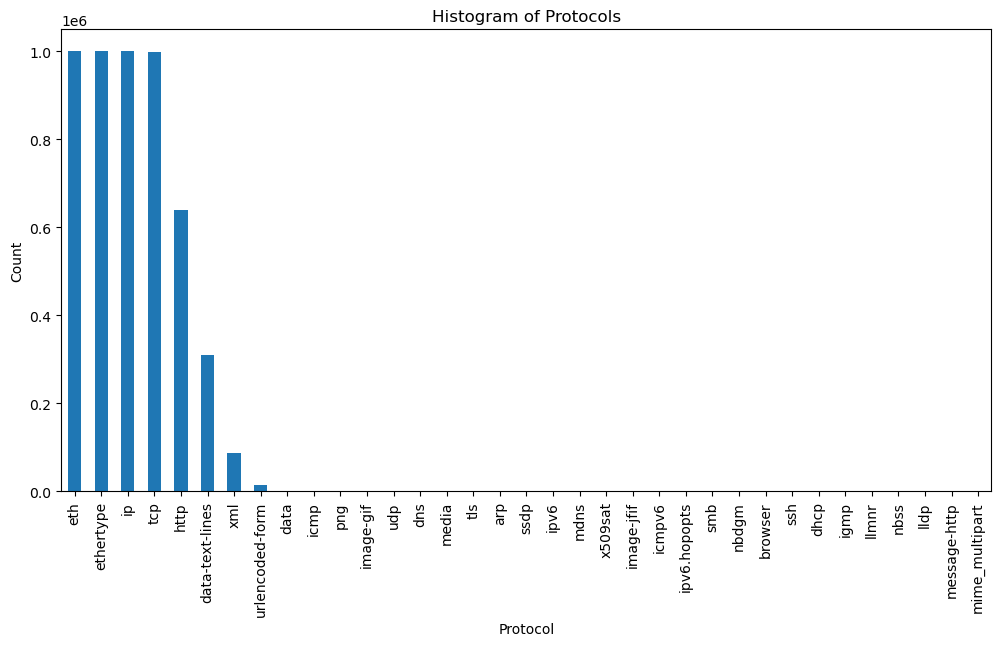

In [38]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
protocol_counts.plot(kind='bar')
# Format y-axis to show actual numbers
plt.title('Histogram of Protocols')
plt.xlabel('Protocol')
plt.ylabel('Count')
# plt.xticks(rotation=45)
plt.show()


In [39]:
# Print the top 10 protocols with their counts
print(protocol_counts.head(10))

eth                1000000
ethertype          1000000
ip                  999929
tcp                 998778
http                638981
data-text-lines     309996
xml                  86692
urlencoded-form      13779
data                   805
icmp                   750
Name: count, dtype: int64


At this stage I would like to simplify the problem as much as I can. Due to my domain knowledge and considering the insight I have got from the dataset, I will be choosing tcp-related features listed below:
- tcp.flags.syn
- tcp.window_size
- tcp.len
- tcp.srcport
- tcp.dstport

and as long as my model gives me 50% of accuracy,
I'm glad. I can always come back and use more features.

In [46]:
columns_to_keep = ['tcp.srcport', 'tcp.dstport','tcp.len', 'tcp.window_size', 'tcp.flags.syn'  ]
df = df[columns_to_keep]

In [47]:
df.shape

(1000000, 5)

In [49]:
import joblib
joblib.dump(df,'df_chosen_features.csv')

['df_chosen_features.csv']